# Modeling the Neurons of an Artificial Neural Network

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define the sigmoid function
def sigmoid(z):
    return np.exp(z) / (1 + np.exp(z))

<b>Note:</b> Here, we're using the sigmoid function. You could also use the ReLU function. The ReLU activation function, while being powerful in artificial neural networks, is easy to define. It simply needs to return the input value if greater than 0; otherwise, it returns 0:

<pre>def relu(x):
    return np.max(0, x) </pre>

In [3]:
# Define the inputs (x) and tunable weights (theta) for the neuron
theta = 1
x = np.linspace(-5, 5, 100)

In [4]:
# Compute the outputs (y) of the neuron
y = sigmoid(theta * x)

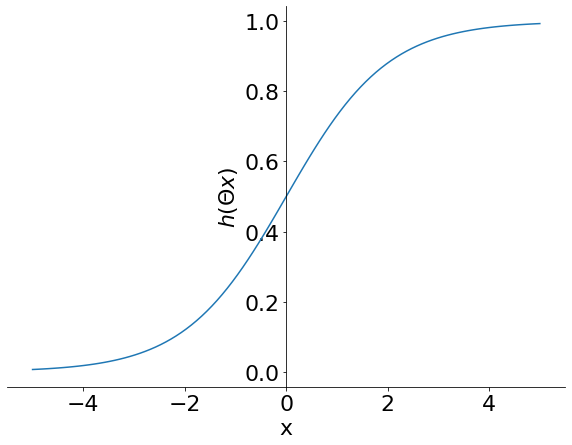

In [5]:
# Plot the output of the neuron versus the input
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlabel('x', fontsize=22)
ax.set_ylabel('$h(\Theta x)$', fontsize=22)
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [6]:
# set other values to theta
theta = 5
y_2 = sigmoid(theta * x)

theta = 0.2
y_3 = sigmoid(theta * x)

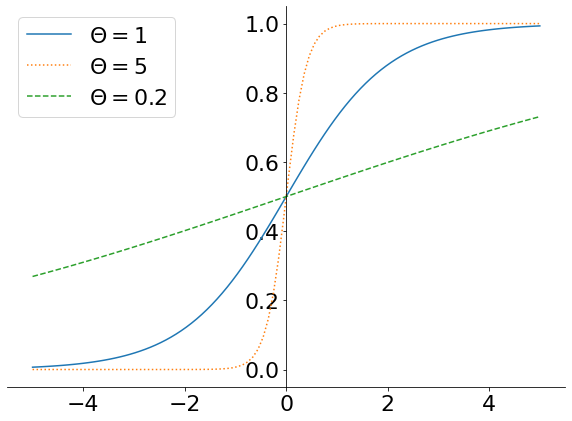

In [7]:
# Plot the three different output curves of the neuron (theta = 1, theta = 5, and theta = 0.2) on one graph
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.plot(x, y, label='$\Theta=1$')
ax.plot(x, y_2, label='$\Theta=5$', linestyle=':')
ax.plot(x, y_3, label='$\Theta=0.2$', linestyle='--')
ax.spines['left'].set_position(('data', 0))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=22)
ax.legend(fontsize=22)
plt.show()

# Modeling Neurons with the ReLU Activation Function

In [8]:
def relu(x):
    return np.max((x, 0))

In [9]:
# compute the output
theta = 1
y = [relu(theta * z) for z in x]

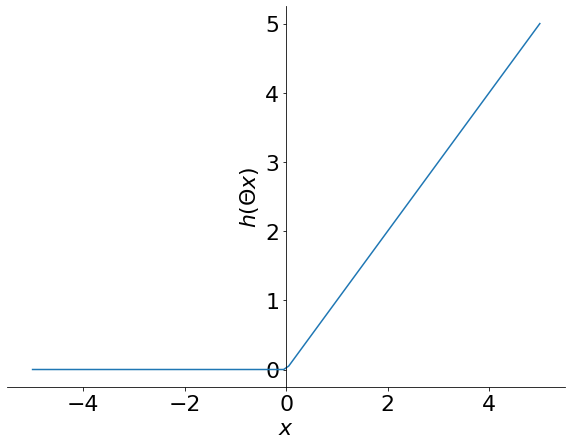

In [10]:
# Plot the output of the neuron versus the input
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlabel('$x$', fontsize=22)
ax.set_ylabel('$h(\Theta x)$', fontsize=22)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('data', 0))
ax.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [11]:
# setting others values to theta
theta = 5
y_2 = [relu(theta * z) for z in x]

theta = 0.2
y_3 = [relu(theta * z) for z in x]

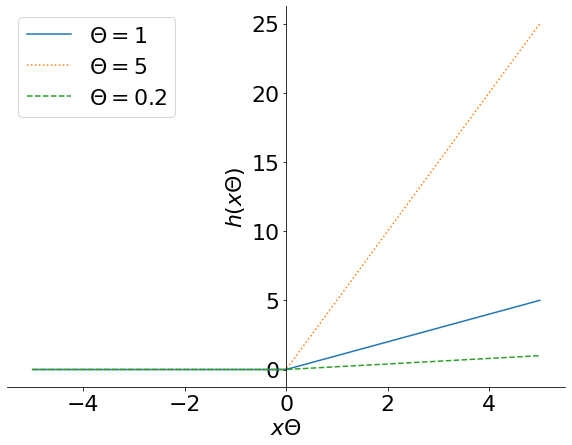

In [12]:
# Plot the three different output curves of the neuron (theta = 1, theta = 5, and theta = 0.2) on one graph
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(x, y, label='$\Theta=1$')
ax.plot(x, y_2, label='$\Theta=5$', linestyle=':')
ax.plot(x, y_3, label='$\Theta=0.2$', linestyle='--')
ax.set_xlabel('$x\Theta$', fontsize=22)
ax.set_ylabel('$h(x\Theta)$', fontsize=22)
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=22)
ax.legend(fontsize=22)
plt.show()

# Defining a Keras Model

In [13]:
# import packages
from keras.models import Sequential
from keras.layers import Dense

The input layer will receive 1,024 values. The second layer (Layer 1) will have 500 units and, because the network is to classify one of 10 different classes, the output layer will have 10 units. In Keras, a model is defined by passing an ordered list of layers to the Sequential model class.

This example uses the Dense layer class, which is a fully connected neural network layer. The first layer will use a ReLU activation function, while the output will use the softmax function to determine the probability of each class

In [14]:
# define the model
model = Sequential(
    [Dense(500, input_shape=(1024, ), activation='relu'),
    Dense(10, activation='softmax')]
)

In [15]:
# seeing the model's parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               512500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5010      
Total params: 517,510
Trainable params: 517,510
Non-trainable params: 0
_________________________________________________________________


This table summarizes the structure of the neural network. We can see that there are the two layers that we specified, with 500 units in the first layer and 10 output units in the second layer. The Param # column tells us how many trainable weights are available in that specific layer. The table also tells us that there are 517,510 trainable weights in total within the network.

# Training a Keras Neural Network Model

In [16]:
# import packages
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Load the sample of the CIFAR-10 dataset
with open('datasets/data_batch_1', 'rb') as f:
    batch_1 = pickle.load(f, encoding='bytes')

In [18]:
# look the keys of the dictionary
batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

Note that the keys are stored as binary strings as denoted by b'

In [19]:
# look the labels
labels = batch_1[b'labels']
labels

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [20]:
# look the contents of the data key
batch_1[b'data']

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

The data key provides a NumPy array with all the image data stored within the array

In [21]:
# look the shape of image data
batch_1[b'data'].shape

(10000, 3072)

We can see that we have 1,000 samples, but each sample is a single dimension of 3,072 samples. Aren't the images supposed to be 32 x 32 pixels? Yes, they are, but because the images are color or RGB images, they contain three channels (red, green, and blue), which means the images are 32 x 32 x 3. They are also flattened, providing 3,072 length vectors. So, we can reshape the array and then visualize a sample of images. According to the CIFAR-10 documentation, the first 1,024 samples are red, the second 1,024 are green, and the third 1,024 are blue:

In [22]:
# separate the 3072 samples in reg, green and blue
images = np.zeros((10000, 32, 32, 3), dtype='uint8')

for idx, img in enumerate(batch_1[b'data']):
    images[idx, :, :, 0] = img[:1024].reshape((32, 32)) # red
    images[idx, :, :, 1] = img[1024:2048].reshape((32, 32)) # green
    images[idx, :, :, 2] = img[2048:].reshape((32, 32)) # blue

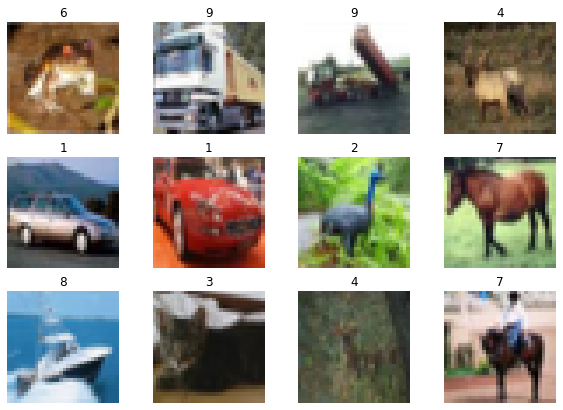

In [23]:
# display the first 12 pictures with their labels
plt.figure(figsize=(10, 7))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')

What is the actual meaning of the labels? 

In [24]:
# load batches.meta
with open('datasets/batches.meta', 'rb') as f:
    label_strings = pickle.load(f, encoding='bytes')

label_strings

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [25]:
# Decode the binary strings to get the actual labels
actual_labels = [label.decode() for label in label_strings[b'label_names']]
actual_labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [26]:
# print the labels for the first 12 images
for lab in labels[:12]:
    print(actual_labels[lab], end=', ')

frog, truck, truck, deer, automobile, automobile, bird, horse, ship, cat, deer, horse, 

Now we need to prepare the data for training the model. The first step is to prepare the output. Currently, the output is a list of numbers 0-9, but we need each sample to be represented as a vector of 10 units as per the previous model

In [27]:
# using one-hot encoding
one_hot_labels = np.zeros((images.shape[0], 10))
for idx, lab in enumerate(labels):
    one_hot_labels[idx, lab] = 1

In [28]:
# display one-hot encoding values for the first 12 samples
one_hot_labels[:12]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

The model has 1,024 inputs because it expects a 32 x 32 grayscale image. Take the average of the three channels for each image to convert it to RGB

In [29]:
images = images.mean(axis=-1)

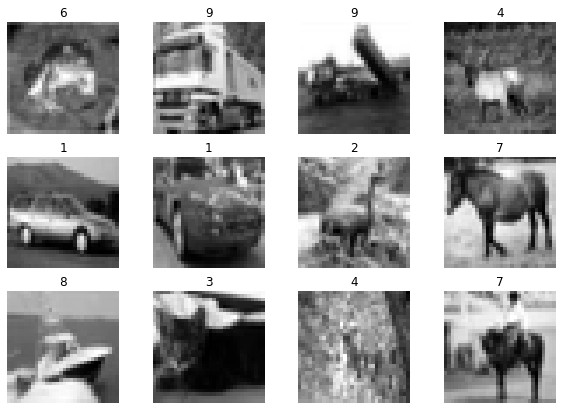

In [30]:
# display the first 12 images again
plt.figure(figsize=(10, 7))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(labels[i])
    plt.axis('off')

In [31]:
# scale the images to be between 0 and 1, which is required for all inputs to a neural network
images = images / 255

In [32]:
# reshape the images
images = images.reshape((-1, 32 * 32))

In [33]:
# create train e test samples
x_train = images[:7000]
y_train = one_hot_labels[:7000]

x_test = images[7000:]
y_test = one_hot_labels[7000:]

In [34]:
# Redefine the model with the same
model = Sequential(
    [Dense(500, input_shape=(1024,), activation='relu'), 
     Dense(10, activation='softmax')]
                  )

In [35]:
# compile the method to specify the training parameters
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [36]:
# training the model
model.fit(x_train, y_train,
        epochs=100,
        validation_data=(x_test, y_test),
        shuffle=False)

Epoch 1/100
219/219 [==============================] - 11s 14ms/step - loss: 2.3275 - accuracy: 0.1673 - val_loss: 2.0920 - val_accuracy: 0.2333
Epoch 2/100
219/219 [==============================] - 1s 6ms/step - loss: 2.0751 - accuracy: 0.2402 - val_loss: 2.0560 - val_accuracy: 0.2397
Epoch 3/100
219/219 [==============================] - 1s 7ms/step - loss: 2.0176 - accuracy: 0.2661 - val_loss: 2.0137 - val_accuracy: 0.2677
Epoch 4/100
219/219 [==============================] - 1s 6ms/step - loss: 1.9693 - accuracy: 0.2884 - val_loss: 1.9827 - val_accuracy: 0.2817
Epoch 5/100
219/219 [==============================] - 1s 6ms/step - loss: 1.9309 - accuracy: 0.2977 - val_loss: 1.9639 - val_accuracy: 0.2873
Epoch 6/100
219/219 [==============================] - 1s 6ms/step - loss: 1.8960 - accuracy: 0.3187 - val_loss: 1.9437 - val_accuracy: 0.3010
Epoch 7/100
219/219 [==============================] - 1s 6ms/step - loss: 1.8623 - accuracy: 0.3249 - val_loss: 1.9411 - val_accuracy: 0.29

Epoch 58/100
219/219 [==============================] - 1s 6ms/step - loss: 1.0168 - accuracy: 0.6586 - val_loss: 2.4540 - val_accuracy: 0.3177
Epoch 59/100
219/219 [==============================] - 1s 6ms/step - loss: 1.0041 - accuracy: 0.6595 - val_loss: 2.4761 - val_accuracy: 0.3177
Epoch 60/100
219/219 [==============================] - 1s 6ms/step - loss: 0.9954 - accuracy: 0.6626 - val_loss: 2.4811 - val_accuracy: 0.3197
Epoch 61/100
219/219 [==============================] - 1s 6ms/step - loss: 0.9811 - accuracy: 0.6647 - val_loss: 2.5094 - val_accuracy: 0.3167
Epoch 62/100
219/219 [==============================] - 1s 6ms/step - loss: 0.9672 - accuracy: 0.6752 - val_loss: 2.5493 - val_accuracy: 0.3103
Epoch 63/100
219/219 [==============================] - 1s 6ms/step - loss: 0.9639 - accuracy: 0.6722 - val_loss: 2.5599 - val_accuracy: 0.3117
Epoch 64/100
219/219 [==============================] - 1s 6ms/step - loss: 0.9442 - accuracy: 0.6820 - val_loss: 2.5811 - val_accuracy:

We achieved approximately 78.15% classification accuracy over the training data and 31.03% classification accuracy over the validation data for the 10,000 samples using this network

<b> Obs:</b> We are using Keras to train our neural network model. The initialization of weights in a Keras layer is done randomly and cannot be controlled by any random seed

In [37]:
# making predictions for the first 12 samples
predictions = model.predict(images[:12])
predictions

array([[1.33622503e-02, 2.80694868e-02, 1.25938724e-03, 3.77899259e-02,
        1.23708658e-01, 4.06700361e-04, 7.92998970e-01, 1.18570082e-04,
        2.28604977e-03, 1.55794400e-08],
       [4.61885996e-09, 4.26513374e-01, 1.62163179e-03, 1.62207410e-02,
        1.39009217e-07, 3.45234694e-05, 2.08934453e-05, 1.99374714e-04,
        7.43971853e-08, 5.55389345e-01],
       [7.84869641e-02, 1.54513985e-01, 3.11175136e-05, 3.72398808e-03,
        3.61401821e-03, 7.30998772e-06, 2.32218241e-04, 7.92825818e-02,
        9.25899541e-04, 6.79181874e-01],
       [6.16051489e-03, 4.44971723e-03, 1.70566479e-03, 5.33753932e-02,
        8.56263041e-01, 4.86659911e-03, 7.11550415e-02, 1.70091761e-03,
        3.23030370e-04, 1.18370615e-07],
       [5.30595668e-02, 9.30842876e-01, 8.91718077e-09, 7.25951793e-07,
        1.69579284e-08, 5.88342930e-09, 1.52208983e-07, 1.17325192e-06,
        1.58692338e-02, 2.26232441e-04],
       [1.50555279e-04, 9.36066210e-01, 5.45239949e-04, 1.27635757e-03,
   

In [38]:
# We can use the argmax method to determine the most likely class for each sample
np.argmax(predictions, axis=1)

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 2, 0], dtype=int64)

In [39]:
# comparing with the labels
labels[:12]

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7]

# Simple Autoencoder

In [99]:
# import packages
from keras.models import Model
from keras.layers import Input, Dense

import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [100]:
# load data
with open('datasets/data_batch_1', 'rb') as f:
    batch_1 = pickle.load(f, encoding='bytes')

In [101]:
images = np.zeros((10000, 32, 32, 3), dtype='uint8')

for idx, img in enumerate(batch_1[b'data']):
    images[idx, :, :, 0] = img[:1024].reshape((32, 32)) # Red
    images[idx, :, :, 1] = img[1024:2048].reshape((32, 32)) # Green
    images[idx, :, :, 2] = img[2048:].reshape((32, 32)) # Blue

In [102]:
images = images.mean(axis=-1)
images = images / 255.0
images = images.reshape((-1, 32 ** 2))

In [103]:
# define autoencoder model
input_layer = Input(shape=(1024, ))

In [104]:
# Define a Dense layer of 256 units (a compression ratio of 1024/256 = 4)
encoding_stage = Dense(256, activation='relu')(input_layer)

In [105]:
# define decode layer
decoding_stage = Dense(1024, activation='sigmoid')(encoding_stage)

In [106]:
# construct the model
autoencoder = Model(input_layer, decoding_stage)

In [107]:
# compile the autoencoder
autoencoder.compile(loss='binary_crossentropy', optimizer='adadelta')

Note: adadelta is a more sophisticated version of stochastic gradient descent where the learning rate is adjusted on the basis of a window of recent gradient updates. Compared to the other methods of modifying the learning rate, this prevents the gradient of very old epochs from influencing the learning rate.

In [108]:
# fit the model
autoencoder.fit(images, images, epochs=100)

Epoch 1/100
313/313 [==============================] - 3s 7ms/step - loss: 0.7018
Epoch 2/100
313/313 [==============================] - 2s 7ms/step - loss: 0.7013
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.7008
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.7003
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6999
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6994
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6992
Epoch 8/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6988
Epoch 9/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6985: 0s - 
Epoch 10/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6981
Epoch 11/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6979
Epoch 12/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6976
Ep

313/313 [==============================] - 3s 8ms/step - loss: 0.6930
Epoch 99/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6930
Epoch 100/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6930


In [109]:
# make predictions with encoding stage
encoder_output = Model(input_layer, encoding_stage).predict(images[:5])

In [110]:
# reshape the encoder output
encoder_output = encoder_output.reshape((-1, 16, 16)) * 255

In [111]:
# make predictions with decoding stage
decoder_output = autoencoder.predict(images[:5])

In [112]:
# reshape the output
decoder_output = decoder_output.reshape((-1, 32, 32)) * 255

In [113]:
# reshape the original images
images = images.reshape((-1, 32, 32))

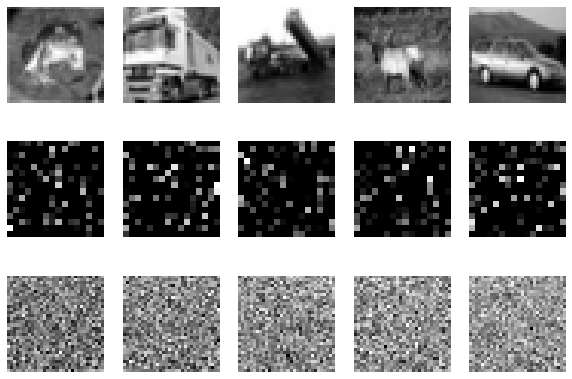

In [114]:
# plot original image, encoder output and decoder output
plt.figure(figsize=(10, 7))
for i in range(5):
    # plot original image
    plt.subplot(3, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    
    # plot the encoder output
    plt.subplot(3, 5, i+6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.axis('off')
    
    # plot the decoder output
    plt.subplot(3, 5, i+11)
    plt.imshow(decoder_output[i], cmap='gray')
    plt.axis('off')

# Multi-Layer Autoencoder

In [52]:
with open('datasets/data_batch_1', 'rb') as f:
    dat = pickle.load(f, encoding='bytes')

In [53]:
images = np.zeros((10000, 32, 32, 3), dtype='uint8')
for idx, img in enumerate(dat[b'data']):
    images[idx, :, :, 0] = img[:1024].reshape((32, 32)) # Red
    images[idx, :, :, 1] = img[1024:2048].reshape((32, 32)) # Green
    images[idx, :, :, 2] = img[2048:].reshape((32, 32)) # Blue

In [54]:
images = images.mean(axis=-1)
images = images / 255.0
images = images.reshape((-1, 32 ** 2))
images

array([[0.24052288, 0.1751634 , 0.18431373, ..., 0.70588235, 0.46143791,
        0.3751634 ],
       [0.67712418, 0.52156863, 0.39738562, ..., 0.54248366, 0.54771242,
        0.54901961],
       [1.        , 0.99215686, 0.99215686, ..., 0.32156863, 0.32287582,
        0.32679739],
       ...,
       [0.25098039, 0.21437908, 0.27843137, ..., 0.28888889, 0.29673203,
        0.29934641],
       [0.99346405, 0.99477124, 0.85620915, ..., 0.8379085 , 1.        ,
        0.99738562],
       [0.1620915 , 0.16078431, 0.15816993, ..., 0.64705882, 0.64705882,
        0.64836601]])

In [55]:
# define the multi-layer autoencoder model
input_layer = Input(shape=(1024, ))

In [56]:
# add another layer
hidden_encoding = Dense(512, activation='relu')(input_layer)

In [57]:
# add encoding alyer
encoding_stage = Dense(256, activation='relu')(hidden_encoding)

In [58]:
# add decoding hidden layer
hidden_decoding = Dense(512, activation='relu')(encoding_stage)

In [59]:
# add decoding layer
decoding_stage = Dense(1024, activation='sigmoid')(hidden_decoding)

In [60]:
# construct the model
autoencoder = Model(input_layer, decoding_stage)

In [61]:
# compile the autoencoder
autoencoder.compile(loss='binary_crossentropy', optimizer='adadelta')

In [62]:
autoencoder.fit(images, images, epochs=100)

Epoch 1/100
313/313 [==============================] - 5s 13ms/step - loss: 0.6976
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6973
Epoch 3/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6971
Epoch 4/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6968
Epoch 5/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6965
Epoch 6/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6963
Epoch 7/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6961
Epoch 8/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6960
Epoch 9/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6958
Epoch 10/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6956
Epoch 11/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6955
Epoch 12/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6954
E

313/313 [==============================] - 5s 17ms/step - loss: 0.6929
Epoch 99/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6929
Epoch 100/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6928


In [63]:
# make prediction
encoder_output = Model(input_layer, encoding_stage).predict(images[:5])

In [64]:
# reshape the encoder output
encoder_output = encoder_output.reshape((-1, 16, 16)) * 255

In [65]:
# store the decoder output
decoder_output = autoencoder.predict(images[:5])

In [66]:
# reshape the output
decoder_output = decoder_output.reshape((-1, 32, 32)) * 255

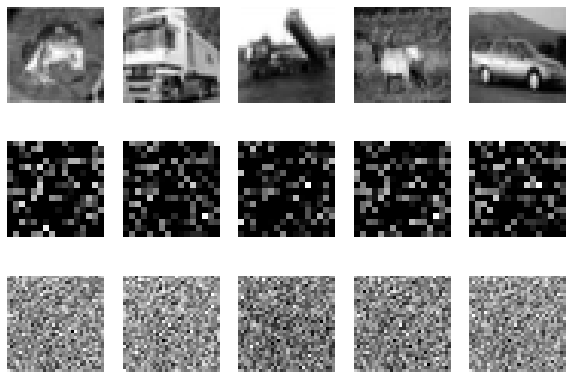

In [67]:
# plot original image, encoder output and decoder output
images = images.reshape((-1, 32, 32))
plt.figure(figsize=(10, 7))
for i in range(5):
    # Plot original images
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    # Plot encoder output
    plt.subplot(3, 5, i + 6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.axis('off')
    # Plot decoder output 
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoder_output[i], cmap='gray')
    plt.axis('off')

# Convolutional Autoencoder

In [68]:
# import packages
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

In [69]:
# load data
with open('datasets/data_batch_1', 'rb') as f:
    batch_1 = pickle.load(f, encoding='bytes')

In [70]:
# format data
images = np.zeros((10000, 32, 32, 3), dtype='uint8')

for idx, img in enumerate(batch_1[b'data']):
    images[idx, :, :, 0] = img[:1024].reshape((32, 32)) # Red
    images[idx, :, :, 1] = img[1024:2048].reshape((32, 32)) # Green
    images[idx, :, :, 2] = img[2048:].reshape((32, 32)) # Blue
    
images = images / 255

In [71]:
# define the convolutional autoencoder model
input_layer = Input(shape=(32, 32, 3))

In [72]:
# Add a convolutional stage with 32 layers or filters, a 3 x 3 weight matrix, a ReLU activation function
hidden_encoding = Conv2D(32, # number of filters in the weight matrix
                        (3, 3), # shape of the weight matrix
                        activation='relu',
                        padding='same',)(input_layer)

MaxPooling looks at all the values in an image, scanning through with a 2 x 2 matrix. The maximum value in each 2 x 2 area is returned, thus reducing the size of the encoded layer by a half

In [73]:
# add a max pooling layer to the encoder with a 2x2 kernel
encoded = MaxPooling2D((2, 2))(hidden_encoding)

In [74]:
# add a decoding convolutional layer
hidden_decoding = Conv2D(32,
                        (3, 3),
                        activation='relu',
                        padding='same',)(encoded)

In [75]:
upsample_decoding = UpSampling2D((2, 2))(hidden_decoding)

In [76]:
# add the final convolutional stage using three layers for the RGB Channel
decoded = Conv2D(3, 
                (3, 3),
                activation='relu',
                padding='same',)(upsample_decoding)

In [77]:
# construct the model
autoencoder = Model(input_layer, decoded)

In [78]:
# seeing the structure of the model
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 3)         867       
Total params: 11,011
Trainable params: 11,011
Non-trainable params: 0
_______________________________________________________

In [79]:
# compile the autoencoder
autoencoder.compile(loss='binary_crossentropy', optimizer='adadelta')

In [80]:
# fit the model
autoencoder.fit(images, images, epochs=20)

Epoch 1/20
313/313 [==============================] - 29s 81ms/step - loss: 3.0234
Epoch 2/20
313/313 [==============================] - 28s 88ms/step - loss: 2.9436
Epoch 3/20
313/313 [==============================] - 29s 91ms/step - loss: 2.8906
Epoch 4/20
313/313 [==============================] - 27s 86ms/step - loss: 2.8063
Epoch 5/20
313/313 [==============================] - 26s 84ms/step - loss: 2.7639
Epoch 6/20
313/313 [==============================] - 27s 85ms/step - loss: 2.7097
Epoch 7/20
313/313 [==============================] - 27s 85ms/step - loss: 2.6295
Epoch 8/20
313/313 [==============================] - 27s 85ms/step - loss: 2.4579
Epoch 9/20
313/313 [==============================] - 27s 87ms/step - loss: 1.5866
Epoch 10/20
313/313 [==============================] - 27s 86ms/step - loss: 1.2377
Epoch 11/20
313/313 [==============================] - 26s 83ms/step - loss: 1.1011
Epoch 12/20
313/313 [==============================] - 26s 83ms/step - loss: 1.0104
E

In [81]:
# calculate the output of the encoding stage
encoder_output = Model(input_layer, encoded).predict(images[:5])

In [82]:
# reshape the encoded output
encoder_output = encoder_output.reshape((-1, 256, 32))

In [83]:
# calculate the output of the decoder
decoder_output = autoencoder.predict(images[:5])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


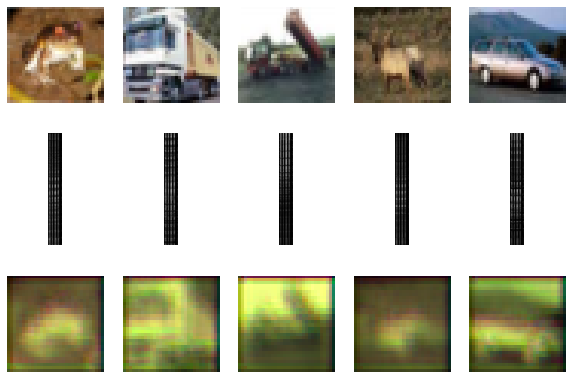

In [84]:
# plot original images, encoder output and decoder output
plt.figure(figsize=(10, 7))
for i in range(5):
    # Plot original images
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    # Plot encoder output
    plt.subplot(3, 5, i + 6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.axis('off')
    # Plot decoder output
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoder_output[i])
    plt.axis('off')